--- Initializing PyTorch Training ---
--- Device: MPS ---


Loading weights:   0%|          | 0/291 [00:00<?, ?it/s]

Moving model to MPS...


The tokenizer you are loading from '/Users/arjandeweerd/AI_Projects/Ass3_LLM_ASP/SchASPLM-Shamantics/local_models/meta-llama/Meta-Llama-3-8B-Instruct-bfloat16' with an incorrect regex pattern: https://huggingface.co/mistralai/Mistral-Small-3.1-24B-Instruct-2503/discussions/84#69121093e8b480e709447d5e. This will lead to incorrect tokenization. You should set the `fix_mistral_regex=True` flag when loading this tokenizer to fix this issue.


Tokenizing train dataset:   0%|          | 0/43 [00:00<?, ? examples/s]

Truncating train dataset:   0%|          | 0/43 [00:00<?, ? examples/s]

Tokenizing eval dataset:   0%|          | 0/11 [00:00<?, ? examples/s]

Truncating eval dataset:   0%|          | 0/11 [00:00<?, ? examples/s]

Starting training on 16 layers...


/opt/homebrew/Caskroom/miniconda/base/envs/schasplm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss,Validation Loss,Entropy,Num Tokens,Mean Token Accuracy
20,1.417518,1.370527,1.280829,62155.000000,0.708913


Loss plot saved to: /Users/arjandeweerd/AI_Projects/Ass3_LLM_ASP/SchASPLM-Shamantics/Finetuning/adapters/llama_pytorch/loss_plot.png
--- Starting Simplified Merge ---
Merging adapters into base model...
Saving final model to: /Users/arjandeweerd/AI_Projects/Ass3_LLM_ASP/SchASPLM-Shamantics/local_models/ft_llama_[pytorch]
--- Fused model ready at /Users/arjandeweerd/AI_Projects/Ass3_LLM_ASP/SchASPLM-Shamantics/local_models/ft_llama_[pytorch] ---


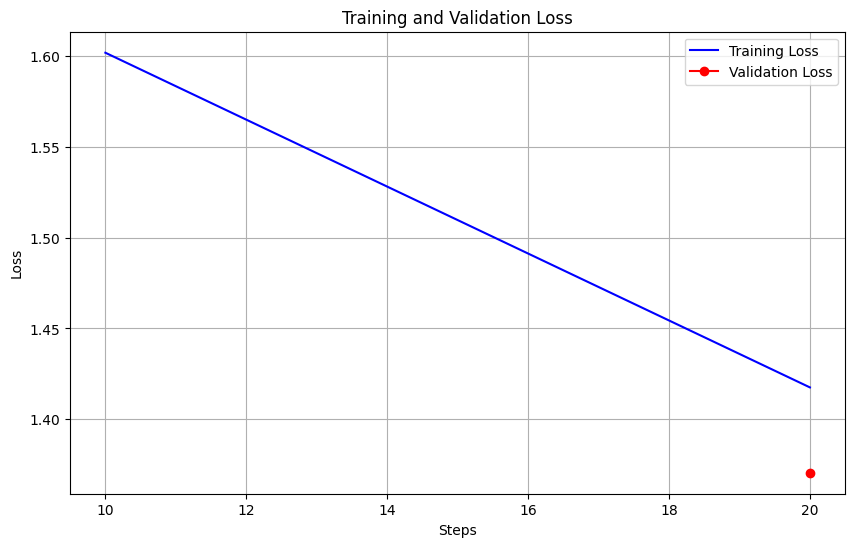

In [ ]:
import sys, os
sys.path.append('..')
from utils_ft import get_model_path, get_output_dir, setup_env, get_root_path
from scripts.train_pytorch import train_pytorch

MODEL_TYPE = "llama" 
#MODEL_TYPE = "qwen"

hf_token = setup_env()
base_model = get_model_path(MODEL_TYPE)
data_folder = os.path.join(get_root_path(), "Finetuning", "data")
adapter_path = os.path.join(get_root_path(), "Finetuning", "adapters", MODEL_TYPE + "_pytorch")
os.makedirs(adapter_path, exist_ok=True)
fused_output = get_output_dir(MODEL_TYPE, "pytorch")


In [ ]:
train_pytorch(
    model_path=base_model, 
    data_folder=data_folder, 
    adapter_path=adapter_path,
    save_path=fused_output, 
    hf_token=hf_token,
    iters=20
)